<a href="https://colab.research.google.com/github/shanksghub/Minute-by-Minute-Price-prediction/blob/master/LTSM%20Project%20with%20code%20comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM



url1 = 'https://raw.githubusercontent.com/shanksghub/Minute-by-Minute-Price-prediction/master/IBM.1Min.TradesOnly.20160128.csv'





Loading Libraries in the above code and the csv.

In [0]:

# import dataset 
df = pd.read_csv(url1)



df.head()
df =df.drop(columns=['Ticker','TimeBarStart','Date'])

In [24]:
df.head()


,FirstTradePrice,HighTradePrice,LowTradePrice,LastTradePrice,VolumeWeightPrice,Volume,TotalTrades
0,121.99,121.99,121.95,121.95,121.97000,64,2
1,121.00,121.78,121.00,121.78,121.37818,132,5
2,121.00,121.00,120.88,120.88,120.92000,273,4
3,120.88,120.88,120.88,120.88,120.88000,500,4
4,120.88,120.88,120.88,120.88,120.88000,3,1


We will make LSTM with HighTradePrice data and convert it to numpy array.


In [25]:
df = df[['HighTradePrice']]


dataset = df.values
dataset = dataset.astype('float32')

dataset

array([[121.99],
       [121.78],
       [121.  ],
       [120.88],
       [120.88],
       [120.96],
       [121.25],
       [121.25],
       [121.6 ],
       [121.5 ],
       [121.24],
       [122.21],
       [122.15],
       [122.12],
       [122.21],
       [122.28],
       [122.11],
       [122.07],
       [122.18],
       [122.27],
       [122.13],
       [122.14],
       [121.88],
       [121.86],
       [122.07],
       [122.3 ],
       [122.38],
       [122.24],
       [122.  ],
       [121.96],
       [121.97],
       [122.16],
       [122.24],
       [122.2 ],
       [122.37],
       [122.34],
       [122.46],
       [122.51],
       [122.32],
       [122.27],
       [122.26],
       [122.27],
       [122.14],
       [122.05],
       [121.94],
       [121.81],
       [121.89],
       [121.82],
       [121.93],
       [121.8 ],
       [121.87],
       [121.9 ],
       [121.88],
       [121.8 ],
       [121.81],
       [121.79],
       [121.77],
       [121.74],
       [121.79

Neural networks are sensitive to input data, especiallly when we are using activation functions like sigmoid or tanh activation functions are used. ISo we rescale our data to the range of 0-to-1, using MinMaxScaler.

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


In [27]:
dataset


array([[0.5692291 ],
       [0.46154022],
       [0.0615387 ],
       [0.        ],
       [0.        ],
       [0.04102707],
       [0.18974686],
       [0.18974686],
       [0.36923218],
       [0.3179512 ],
       [0.18461609],
       [0.6820526 ],
       [0.65128326],
       [0.6358986 ],
       [0.6820526 ],
       [0.7179489 ],
       [0.63077164],
       [0.6102562 ],
       [0.66666794],
       [0.71281815],
       [0.64102554],
       [0.6461525 ],
       [0.5128212 ],
       [0.5025673 ],
       [0.6102562 ],
       [0.72820663],
       [0.7692299 ],
       [0.6974373 ],
       [0.5743599 ],
       [0.55384827],
       [0.5589752 ],
       [0.65641403],
       [0.6974373 ],
       [0.67692184],
       [0.76410294],
       [0.74871826],
       [0.81025696],
       [0.83589935],
       [0.73846054],
       [0.71281815],
       [0.707695  ],
       [0.71281815],
       [0.6461525 ],
       [0.6000023 ],
       [0.54359055],
       [0.47692108],
       [0.51794815],
       [0.482

In [28]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print(len(train), len(test))

276 136




Now let us define the function called create_dataset, which take two inputs,

    Dataset - numpy array that we want to convert into a dataset
    look_back - number of previous time steps to use as input variables to predict the next time period



In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [0]:
look_back = 10
trainX, trainY = create_dataset(train, look_back=look_back)
testX, testY = create_dataset(test, look_back=look_back)

In [31]:
trainX


array([[0.5692291 , 0.46154022, 0.0615387 , ..., 0.18974686, 0.36923218,
        0.3179512 ],
       [0.46154022, 0.0615387 , 0.        , ..., 0.36923218, 0.3179512 ,
        0.18461609],
       [0.0615387 , 0.        , 0.        , ..., 0.3179512 , 0.18461609,
        0.6820526 ],
       ...,
       [0.7538452 , 0.6820526 , 0.68717957, ..., 0.7538452 , 0.7538452 ,
        0.73846054],
       [0.6820526 , 0.68717957, 0.7435913 , ..., 0.7538452 , 0.73846054,
        0.6615372 ],
       [0.68717957, 0.7435913 , 0.7794876 , ..., 0.73846054, 0.6615372 ,
        0.63077164]], dtype=float32)

In [32]:
trainY

array([0.18461609, 0.6820526 , 0.65128326, 0.6358986 , 0.6820526 ,
       0.7179489 , 0.63077164, 0.6102562 , 0.66666794, 0.71281815,
       0.64102554, 0.6461525 , 0.5128212 , 0.5025673 , 0.6102562 ,
       0.72820663, 0.7692299 , 0.6974373 , 0.5743599 , 0.55384827,
       0.5589752 , 0.65641403, 0.6974373 , 0.67692184, 0.76410294,
       0.74871826, 0.81025696, 0.83589935, 0.73846054, 0.71281815,
       0.707695  , 0.71281815, 0.6461525 , 0.6000023 , 0.54359055,
       0.47692108, 0.51794815, 0.48205185, 0.5384636 , 0.47179794,
       0.50769424, 0.5230789 , 0.5128212 , 0.47179794, 0.47692108,
       0.46666718, 0.45640945, 0.44102478, 0.46666718, 0.4512825 ,
       0.3897438 , 0.36923218, 0.35897827, 0.4256401 , 0.42051315,
       0.40512848, 0.4256401 , 0.41025925, 0.3794899 , 0.3282051 ,
       0.31282043, 0.33846283, 0.31282043, 0.21538925, 0.17948914,
       0.17436218, 0.20000076, 0.20000076, 0.2564087 , 0.2564087 ,
       0.30256653, 0.34871674, 0.3435936 , 0.33846283, 0.31282

In [0]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

BUilding the model.

In [34]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=256, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0875
Epoch 2/100
 - 0s - loss: 0.0815
Epoch 3/100
 - 0s - loss: 0.0752
Epoch 4/100
 - 0s - loss: 0.0692
Epoch 5/100
 - 0s - loss: 0.0634
Epoch 6/100
 - 0s - loss: 0.0580
Epoch 7/100
 - 0s - loss: 0.0528
Epoch 8/100
 - 0s - loss: 0.0480
Epoch 9/100
 - 0s - loss: 0.0436
Epoch 10/100
 - 0s - loss: 0.0395
Epoch 11/100
 - 0s - loss: 0.0358
Epoch 12/100
 - 0s - loss: 0.0325
Epoch 13/100
 - 0s - loss: 0.0294
Epoch 14/100
 - 0s - loss: 0.0267
Epoch 15/100
 - 0s - loss: 0.0242
Epoch 16/100
 - 0s - loss: 0.0221
Epoch 17/100
 - 0s - loss: 0.0201
Epoch 18/100
 - 0s - loss: 0.0184
Epoch 19/100
 - 0s - loss: 0.0170
Epoch 20/100
 - 0s - loss: 0.0157
Epoch 21/100
 - 0s - loss: 0.0147
Epoch 22/100
 - 0s - loss: 0.0139
Epoch 23/100
 - 0s - loss: 0.0132
Epoch 24/100
 - 0s - loss: 0.0126
Epoch 25/100
 - 0s - loss: 0.0122
Epoch 26/100
 - 0s - loss: 0.0119
Epoch 27/100
 - 0s - loss: 0.0116
Epoch 28/100
 - 0s - loss: 0.0115
Epoch 29/100
 - 0s - loss: 0.0113
Epoch 30/100
 - 0s - lo

In [0]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)




We have to invert the predictions before calculating error to so that reports will be in same units as our original data


In [0]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [37]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.18 RMSE
Test Score: 0.17 RMSE


In [0]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

In [0]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(dataset) - 1, :] = testPredict

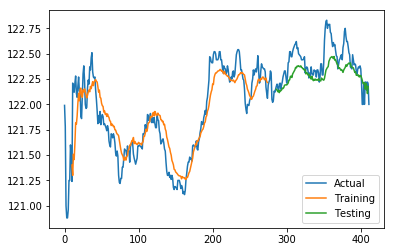

In [42]:
plt.plot(df['HighTradePrice'], label='Actual')
plt.plot(pd.DataFrame(trainPredictPlot, columns=["close"], index=df.index).close, label='Training')
plt.plot(pd.DataFrame(testPredictPlot, columns=["close"], index=df.index).close, label='Testing')
plt.legend(loc='best')
plt.show()